# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

previsao_renda_raw = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv')
previsao_renda_raw.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [24]:
previsao_renda = previsao_renda_raw[['renda', 'tempo_emprego', 'qtd_filhos', 'posse_de_veiculo',
                                     'posse_de_imovel', 'idade', 'qt_pessoas_residencia']]
previsao_renda.head()

,renda,tempo_emprego,qtd_filhos,posse_de_veiculo,posse_de_imovel,idade,qt_pessoas_residencia
0,3369.24,3.575342,1,False,True,36,3.0
1,6096.14,0.860274,0,True,True,42,2.0
2,5658.98,8.065753,2,True,True,31,4.0
3,7246.69,1.208219,0,True,False,50,2.0
4,4017.37,13.873973,0,False,False,52,2.0


In [25]:
previsao_renda.corr()

,renda,tempo_emprego,qtd_filhos,posse_de_veiculo,posse_de_imovel,idade,qt_pessoas_residencia
renda,1.000000,0.394235,0.009567,0.063414,0.029827,0.042570,0.020977
tempo_emprego,0.394235,1.000000,-0.074250,-0.087514,0.000112,0.323934,-0.065748
qtd_filhos,0.009567,-0.074250,1.000000,0.107959,-0.002525,-0.364303,0.896488
posse_de_veiculo,0.063414,-0.087514,0.107959,1.000000,-0.014727,-0.157837,0.156009
posse_de_imovel,0.029827,0.000112,-0.002525,-0.014727,1.000000,0.122667,-0.007180
idade,0.042570,0.323934,-0.364303,-0.157837,0.122667,1.000000,-0.338805
qt_pessoas_residencia,0.020977,-0.065748,0.896488,0.156009,-0.007180,-0.338805,1.000000


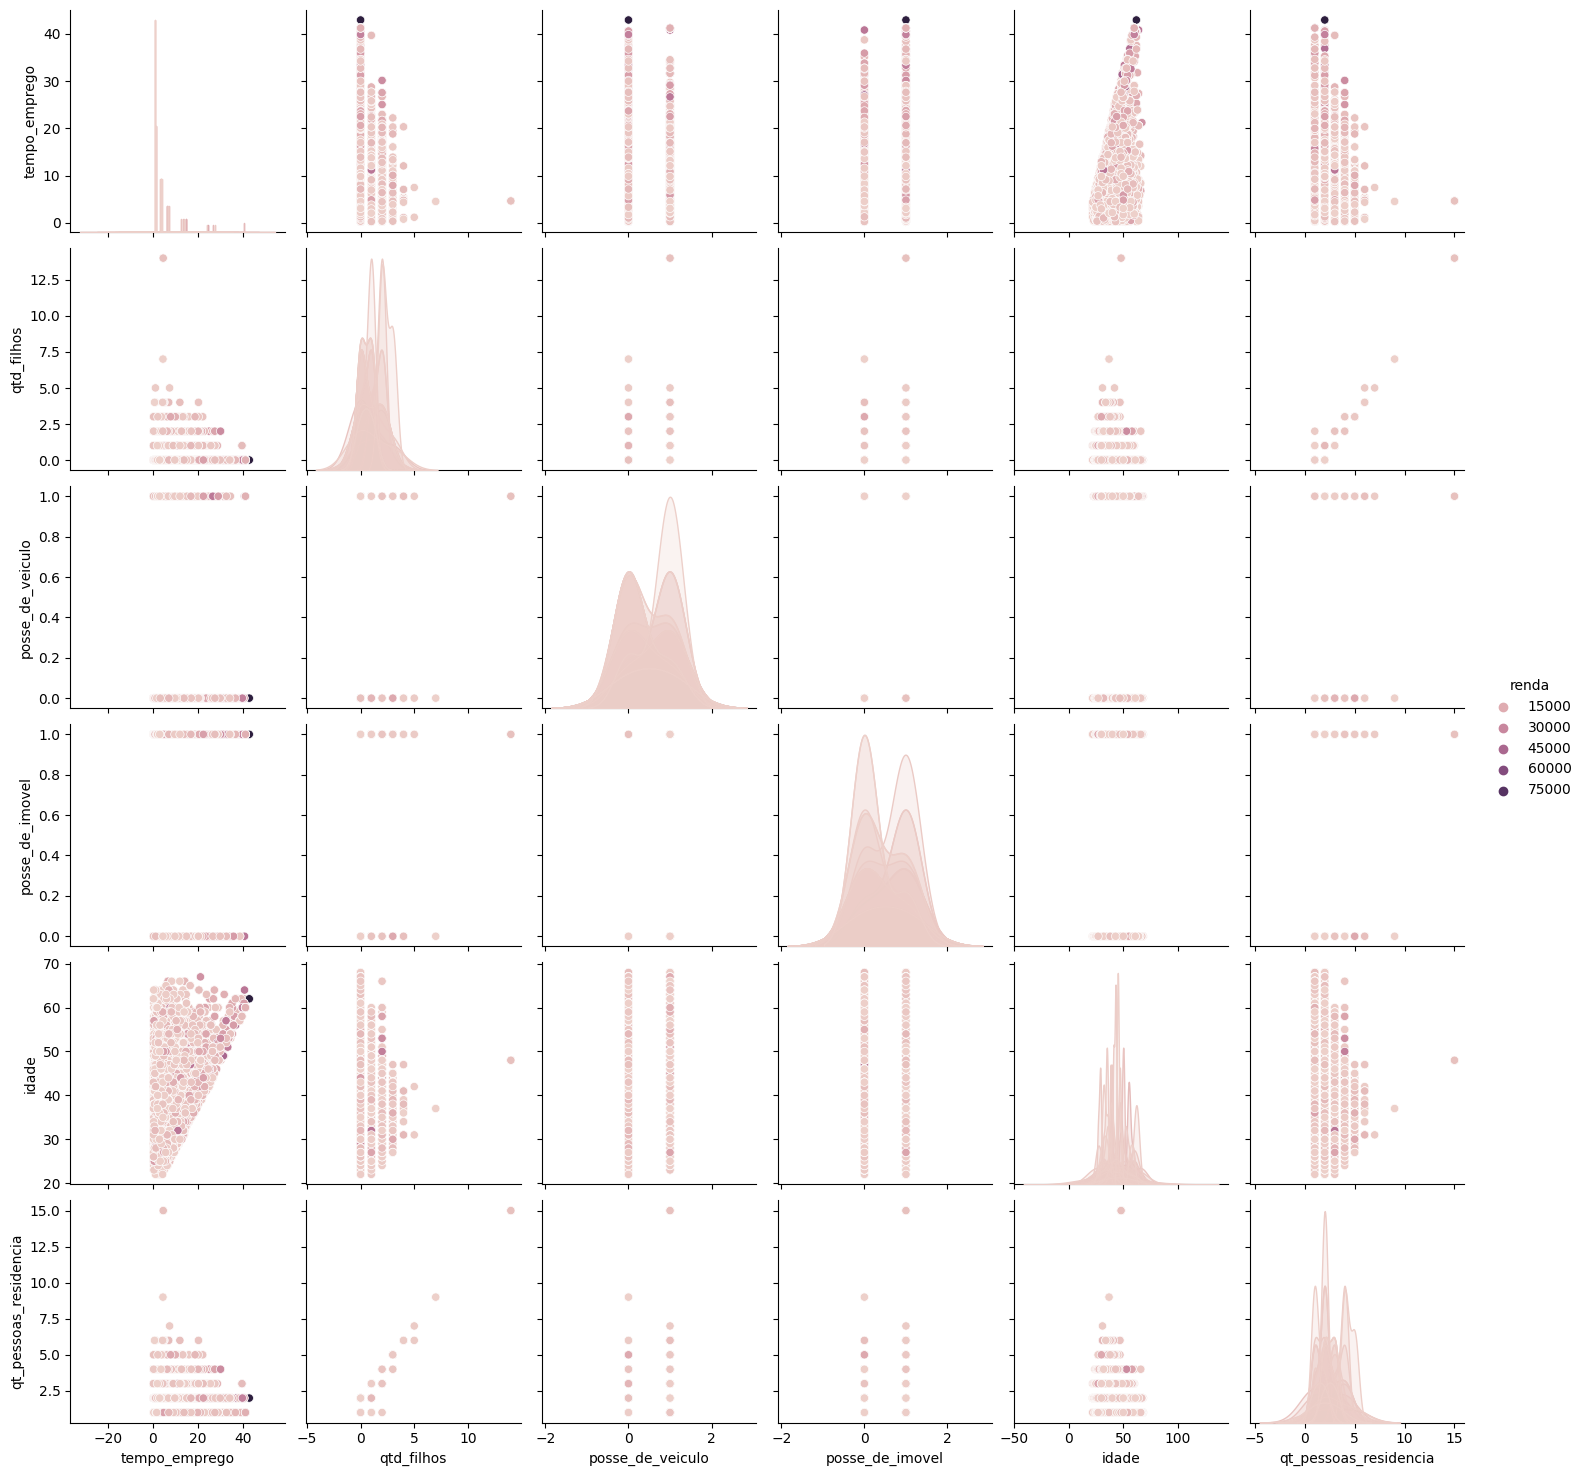

In [26]:
sns.pairplot(previsao_renda, hue='renda')

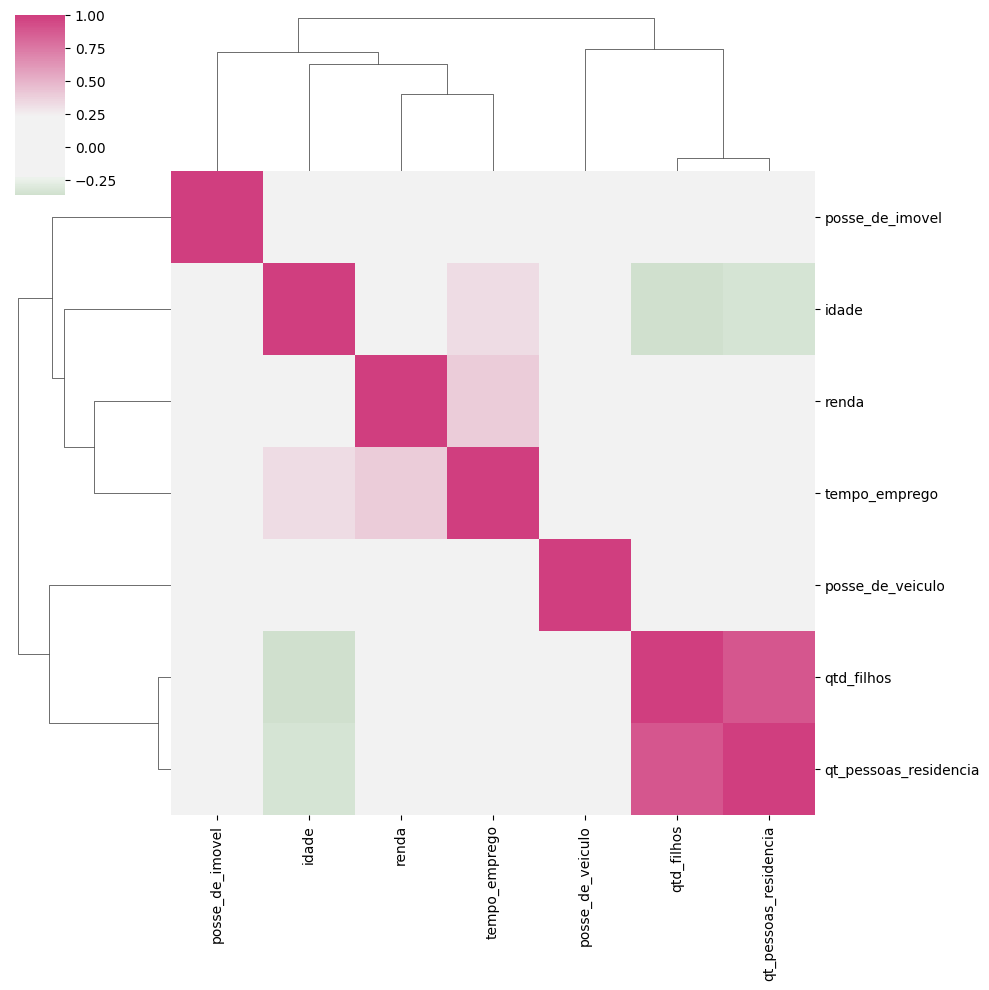

In [27]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(previsao_renda.corr(), figsize=(10, 10), center = 0, cmap=cmap)

A quantidade de filhos (qtd_filhos) está fortemente ligada a quantidade de pessoas na residência qt_pessoas_residencia

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [35]:
previsao_renda_scatterplot = previsao_renda_raw[['renda', 'idade', 'tempo_emprego']]


<Axes: xlabel='renda', ylabel='tempo_emprego'>

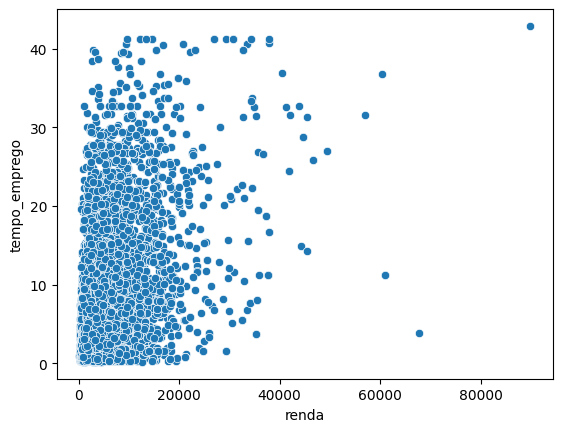

In [37]:
sns.scatterplot(data=previsao_renda_scatterplot, x='renda', y='tempo_emprego')

<Axes: xlabel='renda', ylabel='idade'>

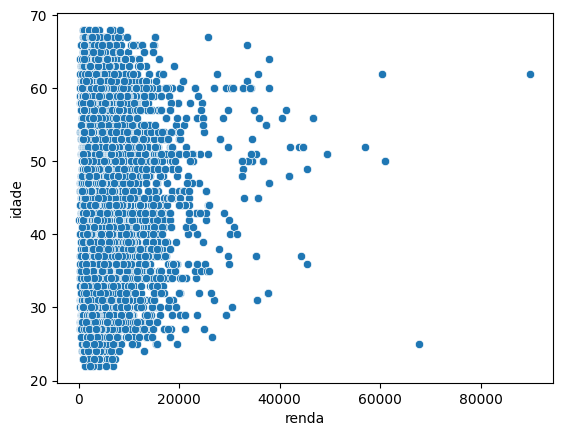

In [36]:
sns.scatterplot(data=previsao_renda_scatterplot, x='renda', y='idade')

<Axes: xlabel='renda', ylabel='tempo_emprego'>

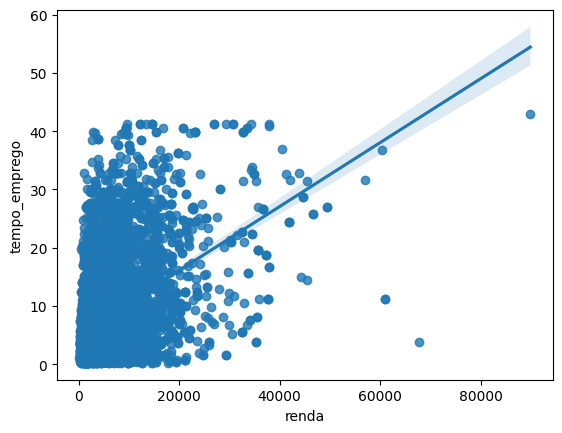

In [45]:
sns.regplot(x='renda', y='tempo_emprego', data = previsao_renda_scatterplot)

<Axes: xlabel='renda', ylabel='idade'>

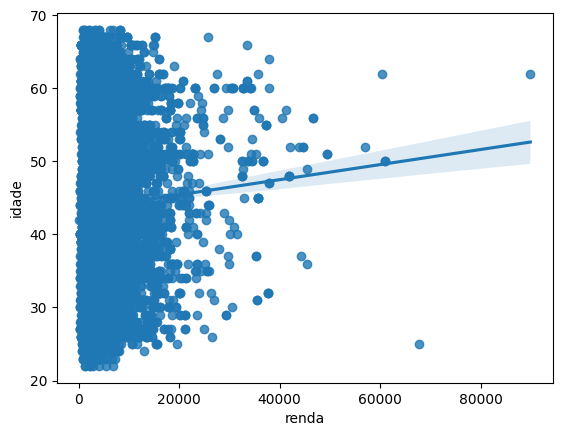

In [46]:
sns.regplot(x='renda', y='idade', data = previsao_renda_scatterplot)

3) Na su aopinião, há outliers na variável renda?

In [43]:
len(previsao_renda_scatterplot[previsao_renda_scatterplot['renda'] > 50_000])

6

In [44]:
len(previsao_renda_scatterplot[previsao_renda_scatterplot['renda'] < 50_000])

14994

Sim, enquanto existem apenas 6 indivíduos com renda acima de 50 mil, existem 14994 indivíduos recebendo abaixo desse valor e isso está gerando outiliers no gráfico.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<Axes: xlabel='log_renda', ylabel='tempo_emprego'>

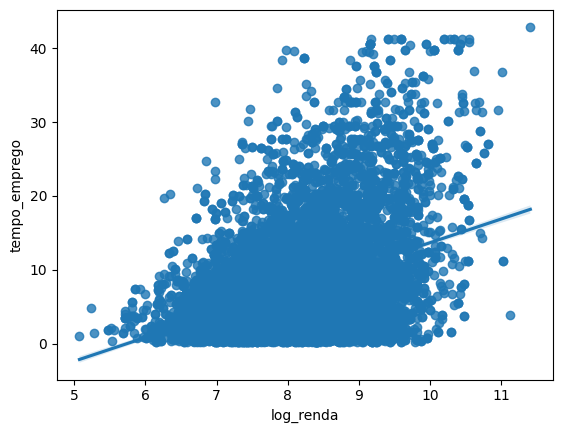

In [51]:
previsao_renda_scatterplot_log = previsao_renda_scatterplot.copy()
previsao_renda_scatterplot_log['log_renda'] = np.log(previsao_renda_scatterplot_log['renda'])

sns.regplot(x='log_renda', y='tempo_emprego', data = previsao_renda_scatterplot_log)

In [52]:
previsao_renda_scatterplot_log.corr()

,renda,idade,tempo_emprego,log_renda
renda,1.000000,0.042570,0.394235,0.835734
idade,0.042570,1.000000,0.323934,0.024712
tempo_emprego,0.394235,0.323934,1.000000,0.379556
log_renda,0.835734,0.024712,0.379556,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

Houve uma melhora na análise.